In [1]:
# Library imports
import numpy as np

import tools
from train import generate_graph

In [2]:
# Fix random seed for reproducibility
np.random.seed(628496)

# Stop on errors
np.seterr('raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
# Generate the synthetic data
edges_by_day, last_day, raw_accounts = tools.simulate_simple_data()

# Count the number of generated edges to validate that it has generated correctly
count_edges = sum(len(day) for day in edges_by_day.values())
print(f'There were {count_edges} edges generated.')

There were 240 edges generated.


In [4]:
# Create a graph object with the generated data
graph = generate_graph(
    raw_accounts=raw_accounts,
    edges_by_day=edges_by_day,
    last_day=last_day,
    node_dimension=256,
    graph_kwords={
        'causal_learning_rate': 0.001,
        'spontaneous_learning_rate': 0.0001,
        'weight_regularisation_rate': 10**(-6)
    }
)

In [5]:
# Train
training_epochs = 1000
extraction_interval = 1
start_spontaneous_from = 300

log_likelihoods, times, weights, baselines = \
    tools.train_recording_params(
        graph, edges_by_day, last_day,
        training_epochs, extraction_interval,
        start_spontaneous_from
    )

100%|██████████| 1000/1000 [2:45:10<00:00,  9.91s/it] 


In [6]:
print(f'The final log_likelihoods was {log_likelihoods[-1]:.2f}.')

The final log_likelihoods was -409.08.


In [7]:
# Save the results so they can be reloaded without having to retrain
import pickle

with open('saved_results//synthetic_data_training_results.pkl', 'wb') as file:
    pickle.dump((log_likelihoods, times, weights, baselines), file)

with open('saved_results//synthetic_data_trained_model.pkl', 'wb') as file:
    pickle.dump(graph, file)

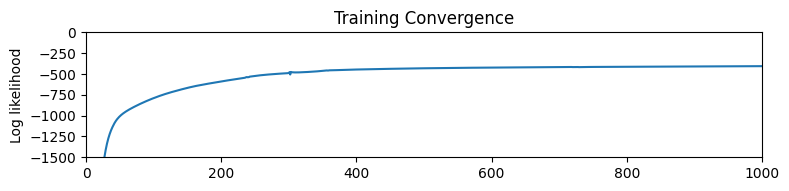

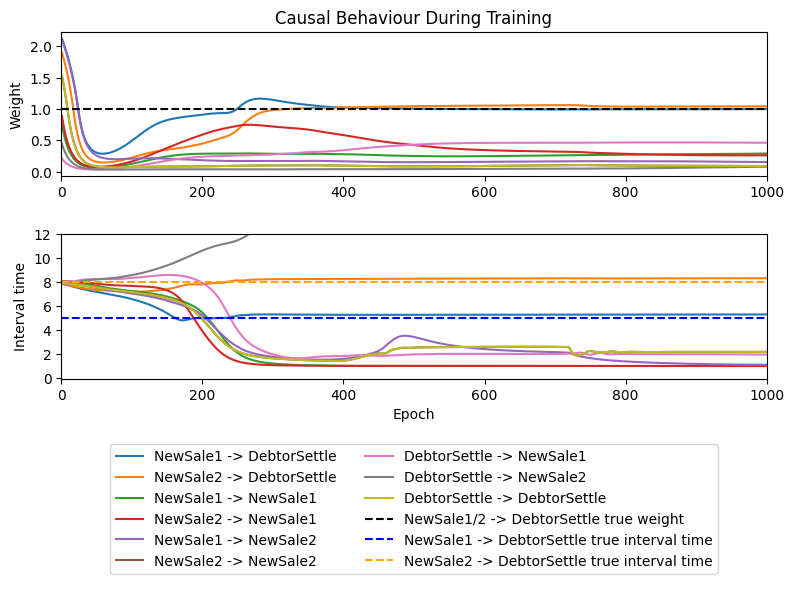

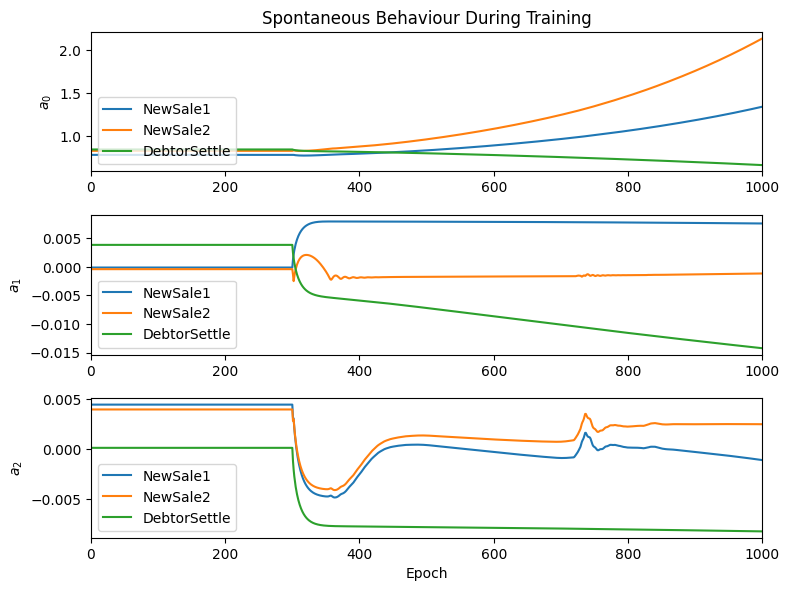

In [8]:
# Plot the log-likelihood, the weights (expected number
# of excitees generated by a single excitor) and interval
# time (the modal time between an excitor and excitee)
tools.plot_training_params(
    log_likelihoods, times, weights, baselines,
    training_epochs, extraction_interval
)